In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
from random import shuffle
import seaborn as sns
from IPython.display import display, HTML
sns.set_theme()


display(HTML("<style>.container{ width:95% !important;}</style>"))

In [2]:
degree = pd.read_excel('../data/stemdegrees2020clean.xlsx')
totaldegree = degree[degree['Type'] == 'Total']
fdegree = degree[degree['Type'] == 'Females']
mdegree = degree[degree['Type'] == 'Males']


In [3]:
def cast_to_single_year(string_with_years):
    """converts multiple year to single year
    """
    last_two_digits = string_with_years[5:]
    full_year = '20' + last_two_digits
    number = float(full_year)
    return number

def cast_to_number(string_with_symbols):
    """converts a string to a number by removing commas and percentage signs
    """
    if isinstance(string_with_symbols, float):  # already a number!
        return string_with_symbols
    no_commas = string_with_symbols.replace(',', '')
    no_percent = no_commas.replace('%', '')
    number = float(no_percent)
    return number

In [4]:
totaldegree['Sex and year'] = totaldegree['Sex and year'].apply(cast_to_single_year)
totaldegree['Total Number'] = totaldegree['Total Number'].apply(cast_to_number)
fdegree['Sex and year'] = fdegree['Sex and year'].apply(cast_to_single_year)
fdegree['Total Number'] = fdegree['Total Number'].apply(cast_to_number)
mdegree['Sex and year'] = mdegree['Sex and year'].apply(cast_to_single_year)
mdegree['Total Number'] = mdegree['Total Number'].apply(cast_to_number)

C:\Users\Srikar\AppData\Local\Temp\ipykernel_28384\2077992811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldegree['Sex and year'] = totaldegree['Sex and year'].apply(cast_to_single_year)
C:\Users\Srikar\AppData\Local\Temp\ipykernel_28384\2077992811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaldegree['Total Number'] = totaldegree['Total Number'].apply(cast_to_number)
C:\Users\Srikar\AppData\Local\Temp\ipykernel_28384\2077992811.py:3: SettingWithCopyWarning: 
A value is trying to be se

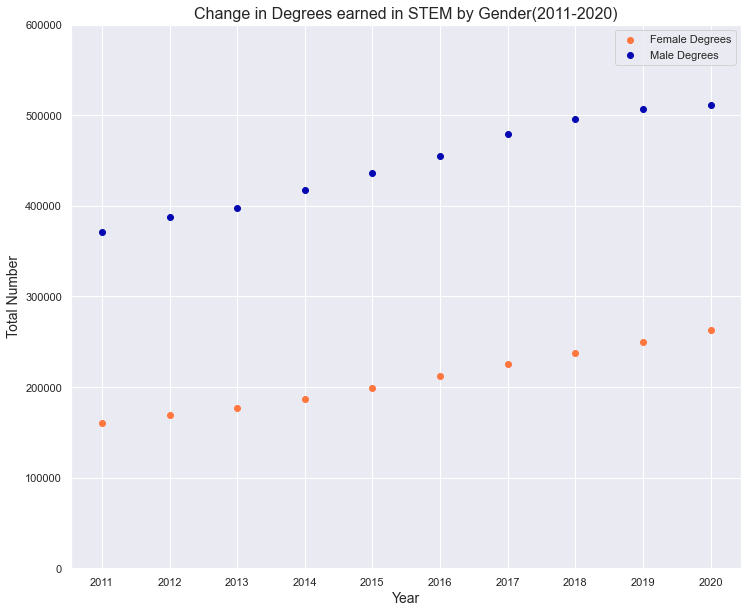

In [18]:

plt.scatter(fdegree['Sex and year'],fdegree['Total Number'], color='#ff763f', label='Female Degrees')
plt.scatter(mdegree['Sex and year'],mdegree['Total Number'], color='#0508b2', label='Male Degrees')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number', fontsize=14)
plt.title('Change in Degrees earned in STEM by Gender(2011-2020)', fontsize=16)
plt.xticks(fdegree['Sex and year'])
plt.ylim(0,600000)
plt.gcf().set_size_inches(12, 10)
plt.legend()

In [19]:
linear_modelf = np.polyfit(fdegree['Sex and year'], fdegree['Total Number'], 1)
linear_modelm = np.polyfit(mdegree['Sex and year'], mdegree['Total Number'], 1)

linear_modelf_fn = np.poly1d(linear_modelf)
linear_modelm_fn = np.poly1d(linear_modelm)

In [26]:
linear_modelf_fn[1]

11698.030303029824

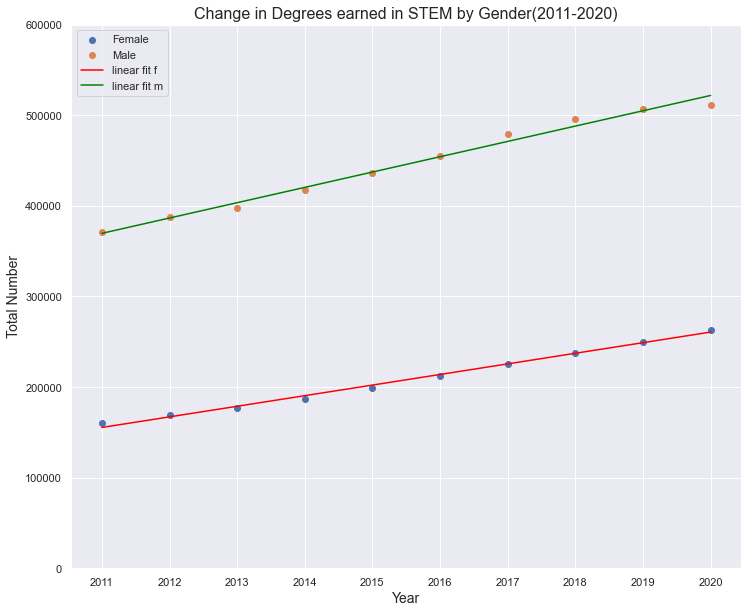

In [23]:
# draw the data
plt.scatter(fdegree['Sex and year'], fdegree['Total Number'], label='Female')
plt.scatter(mdegree['Sex and year'], mdegree['Total Number'], label='Male')

# # add the linear fit line    # plt.plot draws a straight line connecting the points
plt.plot(fdegree['Sex and year'], linear_modelf_fn(fdegree['Sex and year']), color="red", label='linear fit f')
plt.plot(mdegree['Sex and year'], linear_modelm_fn(mdegree['Sex and year']), color="green", label='linear fit m')

# # add text box for the statistics
stats = (f'$m = {linear_modelf[0]:.2f}$\n'
         f'$b = {linear_modelf[1]:.2f}$')
statsm = (f'$m = {linear_modelm[0]:.2f}$\n'
         f'$b = {linear_modelm[1]:.2f}$')
bbox = dict(boxstyle='round', fc='lightgrey', ec='lightgrey', alpha=0.5)
#plt.text(80, -80, stats, fontsize=12, bbox=bbox, horizontalalignment='left')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number', fontsize=14)
plt.title('Change in Degrees earned in STEM by Gender(2011-2020)', fontsize=16)
plt.xticks(fdegree['Sex and year'])
plt.ylim(0,600000)
plt.gcf().set_size_inches(12, 10)
plt.legend()